In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
import json
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
measurement_df = pd.read_sql('SELECT * FROM measurement', engine)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [6]:
station_df = pd.read_sql('SELECT * FROM STATION', engine)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
lastyear_df = pd.read_sql('SELECT * FROM measurement WHERE date >= (select Date(Max(date),"-1 year") from Measurement)order by date', engine)
lastyear_df.head()

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,5091,USC00513117,2016-08-23,0.15,76.0
2,7331,USC00514830,2016-08-23,0.05,80.0
3,8825,USC00517948,2016-08-23,NaN,80.0
4,11851,USC00519523,2016-08-23,0.02,80.0


In [8]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
lastyear_prcp = lastyear_df[["date", "prcp"]].set_index('date').sort_values("date", ascending=False)
lastyear_prcp.head()

,prcp
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.50


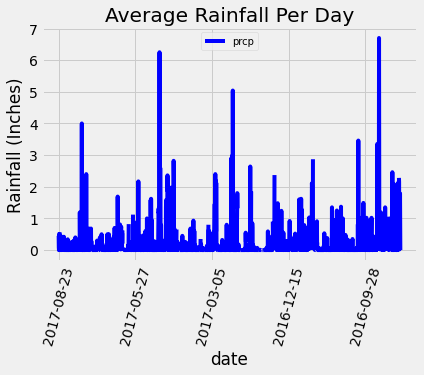

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.style.use('fivethirtyeight')
lastyear_prcp.plot(title="Average Rainfall Per Day", color='b')
plt.xticks(rotation=75)
plt.legend(loc='upper center', prop={'size': 10})
plt.ylabel("Rainfall (Inches)")
plt.show()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastyear_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
measurement_df["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [12]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_df = pd.read_sql('SELECT count (*), station FROM measurement GROUP BY station ORDER BY count(*) desc', engine)
active_df

,count (*),station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [13]:
most_active_df = active_df['station'].values[0]
most_active_df

'USC00519281'

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = f'''
SELECT max(tobs), avg(tobs), min(tobs) FROM measurement WHERE station ="{most_active_df}"
'''
most_active_stat = pd.read_sql(query, engine)
most_active_stat

,max(tobs),avg(tobs),min(tobs)
0,85.0,71.663781,54.0


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastyear_tobs = pd.read_sql('SELECT tobs FROM measurement WHERE date >= (select Date(Max(date),"-1 year") from Measurement)order by date', engine)
lastyear_tobs.head()

,tobs
0,81.0
1,76.0
2,80.0
3,80.0
4,80.0


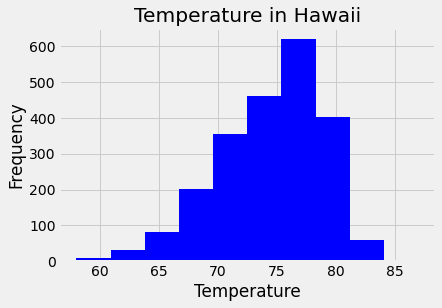

In [16]:
lastyear_tobs.hist(color='b')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature in Hawaii")
plt.show()

In [17]:
#* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d`. The function will return the minimum, average, and maximum temperatures for that range of dates.

# Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from a previous year (i.e., use "2017-08-01").
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
  
    # your code here
    return pd.read_sql('SELECT min(tobs),avg(tobs),max(tobs) FROM measurement WHERE date >= (select Date(Max(date),"-1 year") from Measurement)order by date', engine)
    
# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

   min(tobs)  avg(tobs)  max(tobs)
0       58.0  74.590583       87.0


# Close session

In [18]:
# Close Session
session.close()

NameError: name 'session' is not defined